# Mouse retina development

In [1]:
import math
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from tivelo.main import tivelo
from baseline import run_baseline

(Running UniTVelo 0.2.5.2)
2025-04-05 05:04:18


2025-04-05 13:04:18.204606: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Run TIVelo
Load the dataset. Set the data name with key for cluster, key for embedding and cluster edges (for comparison).

In [2]:
data_name = "retina"
data_path = "/lustre/project/Stat/s1155184322/datasets/velocity/retina_processed.h5ad"
adata = sc.read(data_path)

group_key = "Annotation"
emb_key = "X_umap"
cluster_edges = [('Progenitor', 'Neuroblast'), ('Neuroblast', 'PR'), ('Neuroblast', 'AC/HC'), ('Neuroblast', 'RGC')]

Set the model parameters.

In [3]:
save_folder = "results"
show_fig = True
filter_genes = True
save_coeff = True
constrain = True
loss_fun = "mse"
only_s = False
alpha_1 = 1
alpha_2 = 0.1
batch_size = 1024
n_epochs = 100

tree_gene = None
show_DTI = False
adjust_DTI = False
velocity_key = "velocity"
measure_performance = True

Run the model by function tivelo.

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 20/20 cores)


  0%|          | 0/2726 [00:00<?, ?cells/s]

    finished (0:00:11) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 0 region of root cells and 4 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
'path_dict' added to adata.uns


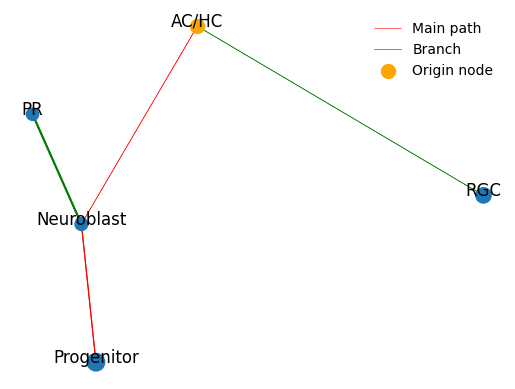


main path: ['AC/HC', 'Neuroblast', 'Progenitor']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 225 tasks      | elapsed:  

mean: -6.399 
median: -2.933 
lower quantile: -18.326 
upper quantile: 9.255 
minimum: -246.821 
maximum: 125.832 
No. of positive scores: 295

branch_1: ['AC/HC', 'RGC']


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 242 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 506 tasks      | elapsed:    4.2s
[Paralle

mean: -4.110 
median: -1.752 
lower quantile: -24.007 
upper quantile: 19.089 
minimum: -218.795 
maximum: 167.652 
No. of positive scores: 316

branch_2: ['Neuroblast', 'PR']


[Parallel(n_jobs=-1)]: Batch computation too fast (0.12915730476379395s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 686 out of 686 | elapsed:    1.5s finished


mean: 8.285 
median: 6.889 
lower quantile: -8.672 
upper quantile: 25.474 
minimum: -182.462 
maximum: 152.762 
No. of positive scores: 434

'path_dict' added to adata.uns
'child_dict' added to adata.uns
'level_dict' added to adata.uns
'threshold_list' added to adata.uns
'd_nn' added to adata.obsp


Model training: 100%|██████████| 100/100 [00:17<00:00,  5.66it/s, cos_s=0.71, cos_u=0.771, mse_s=0.007, mse_u=0.008]


computing velocity graph (using 20/20 cores)


  0%|          | 0/2726 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


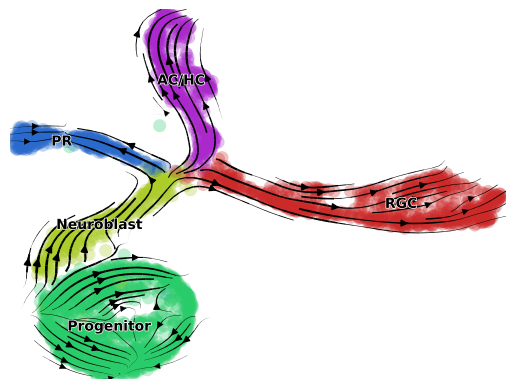

TIVelo:
 CBDir: 0.3941 ICVCoh: 0.7260 
 CBDir2: 0.5418 ICVCoh2: 0.8068 
 TransProbs: 0.4677 VeloCoh: 0.0843


In [4]:
adata_ = tivelo(adata, group_key, emb_key, data_name=data_name, save_folder=save_folder, njobs=-1, tree_gene=tree_gene,
                show_fig=show_fig, filter_genes=filter_genes, constrain=constrain, loss_fun=loss_fun, only_s=only_s,
                alpha_1=alpha_1, alpha_2=alpha_2, batch_size=batch_size, n_epochs=n_epochs, velocity_key="velocity",
                adjust_DTI=adjust_DTI, show_DTI=show_DTI, cluster_edges=cluster_edges,
                measure_performance=measure_performance)

## Run scVelo
Stochastic mode.

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


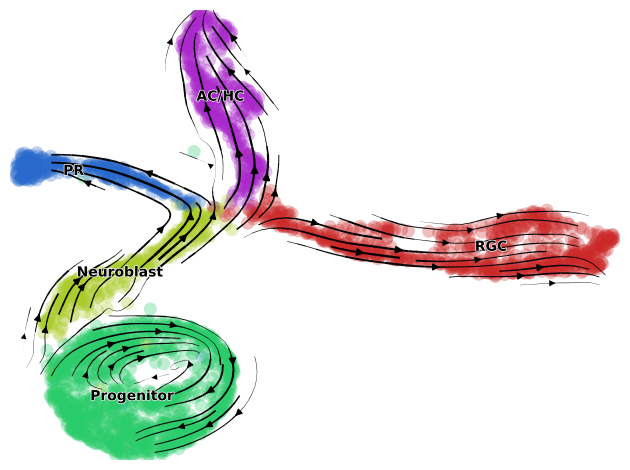

scvelo:
 CBDir: 0.5080 ICVCoh: 0.9106 
 CBDir2: 0.0286 ICVCoh2: 0.8230 
 TransProbs: 0.1290 VeloCoh: -0.0015


In [5]:
adata_scvelo = run_baseline(adata, "scvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

Dynamical mode.

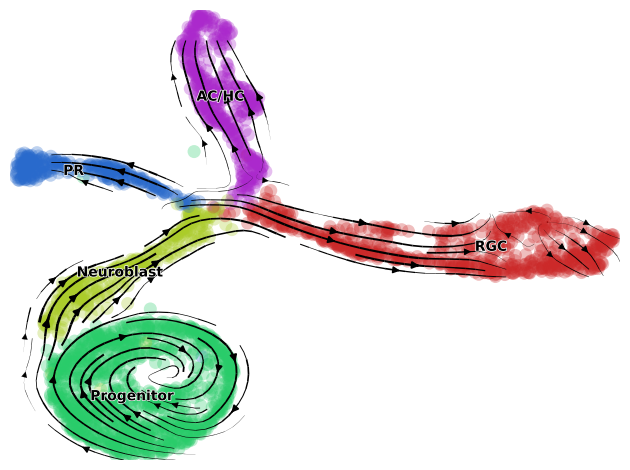

scvelo2:
 CBDir: 0.4707 ICVCoh: 0.8596 
 CBDir2: 0.2648 ICVCoh2: 0.7548 
 TransProbs: 0.2844 VeloCoh: 0.2081


In [6]:
adata_scvelo2 = run_baseline(adata, "scvelo2", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run veloVI.

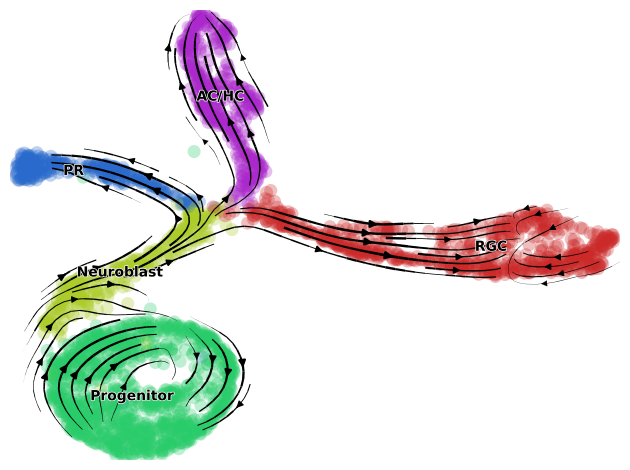

velovi:
 CBDir: 0.5829 ICVCoh: 0.8656 
 CBDir2: 0.1368 ICVCoh2: 0.7815 
 TransProbs: 0.1526 VeloCoh: 0.1540


In [7]:
adata_velovi = run_baseline(adata, "velovi", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run UniTVelo.

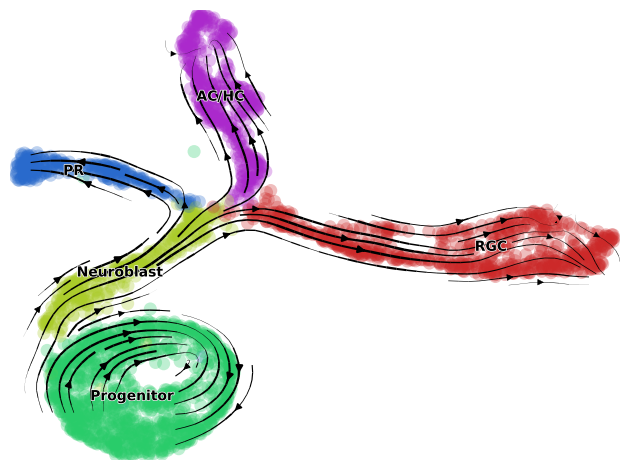

unitvelo:
 CBDir: 0.5571 ICVCoh: 0.7105 
 CBDir2: 0.2999 ICVCoh2: 0.7340 
 TransProbs: 0.2729 VeloCoh: 0.1716


In [3]:
adata_unitvelo = run_baseline(adata, "unitvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                              measure_performance=True, unitvelo_mode="2")

## Run cellDancer

We don't directly run cellDancer here since the environment required by cellDancer may conflict that of TIVelo. We recommend running cellDancer in an independent environment.

computing velocity graph (using 20/20 cores)


  0%|          | 0/2726 [00:00<?, ?cells/s]

    finished (0:00:01) --> added 
    'velocity_S_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_S_umap', embedded velocity vectors (adata.obsm)


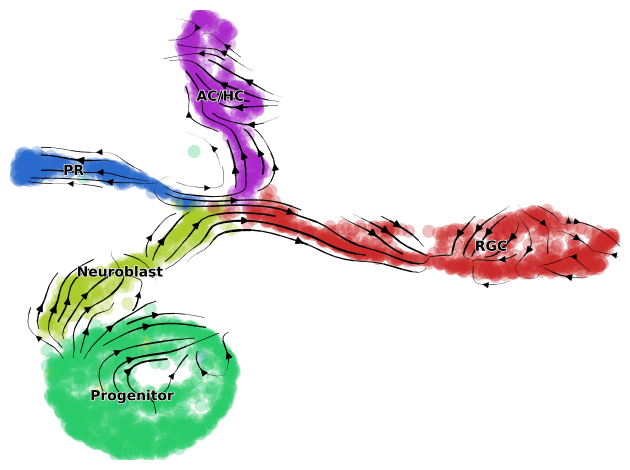

celldancer:
 CBDir: 0.4415 ICVCoh: 0.9091 
 CBDir2: 0.2402 ICVCoh2: 0.4782 
 TransProbs: 0.0311 VeloCoh: -0.2708


In [9]:
adata_celldancer = run_baseline(adata, "celldancer", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                                measure_performance=True)

## Run DeepVelo

We don't directly run DeepVelo here since the environment required by DeepVelo may conflict that of TIVelo. We recommend running DeepVelo in an independent environment.

In [3]:
adata_deepvelo = sc.read("/users/s1155184322/projects/tutorial/DeepVelo/results/retina_deepvelo.h5ad")
velocity_key = "velocity"

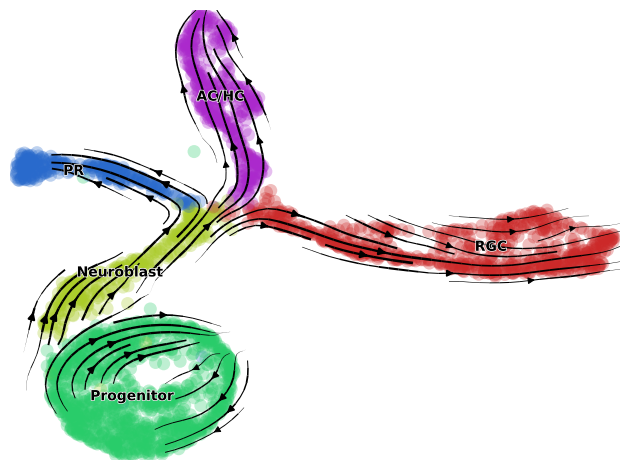

In [4]:
ax = scv.pl.velocity_embedding_stream(adata_deepvelo, vkey=velocity_key, color=group_key, title="", show=False)
plt.tight_layout()

In [5]:
from tivelo.utils.metrics import inner_cluster_coh, cross_boundary_correctness, cross_boundary_scvelo_probs, \
    cross_boundary_correctness2, inner_cluster_coh2, velo_coh
    
_, cbdir = cross_boundary_correctness(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key,
                                                  cluster_edges=cluster_edges, x_emb=emb_key)
_, cbdir2 = cross_boundary_correctness2(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key,
                                                    cluster_edges=cluster_edges)
_, trans_probs = cross_boundary_scvelo_probs(adata_deepvelo, cluster_key=group_key, cluster_edges=cluster_edges,
                                                         trans_g_key="{}_graph".format(velocity_key))
_, icvcoh = inner_cluster_coh(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key)
_, icvcoh2 = inner_cluster_coh2(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key, x_emb=emb_key)
velocoh = velo_coh(adata_deepvelo, velocity_key=velocity_key, trans_g_key="{}_graph".format(velocity_key))

print("DeepVelo:\n", "CBDir:", "%.4f" % cbdir, "ICVCoh:", "%.4f" % icvcoh, "\n",
      "CBDir2:", "%.4f" % cbdir2, "ICVCoh2:", "%.4f" % icvcoh2, "\n",
      "TransProbs:", "%.4f" % trans_probs, "VeloCoh:", "%.4f" % velocoh)

DeepVelo:
 CBDir: 0.6293 ICVCoh: 0.8972 
 CBDir2: 0.1686 ICVCoh2: 0.8395 
 TransProbs: 0.1655 VeloCoh: 0.1840
